In [27]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/jeffrey/GoogleDrive/PulsarSignalSimulator/PulsarSimulator/')
import VersionZeroPointZero as PSS
import math, scipy
import scipy as sp
from scipy import signal

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
Periods = 200
PeriodBins = 2500
Nt = Periods*PeriodBins
S1 = PSS.Signal(81, 100, 20, Nt, 50*Periods)
print("Number of Time Bins:",Nt)

Number of Time Bins: 500000


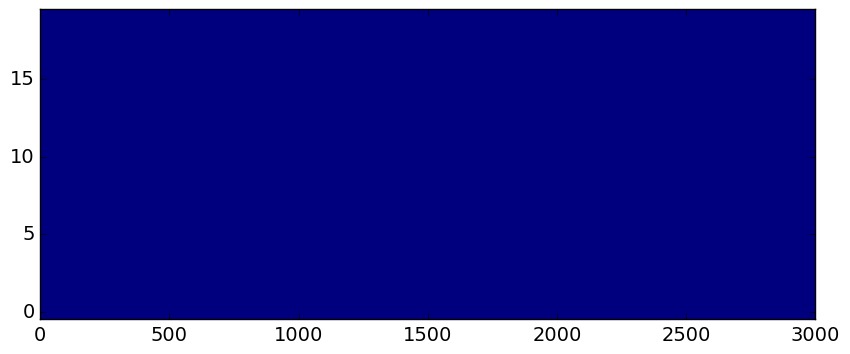

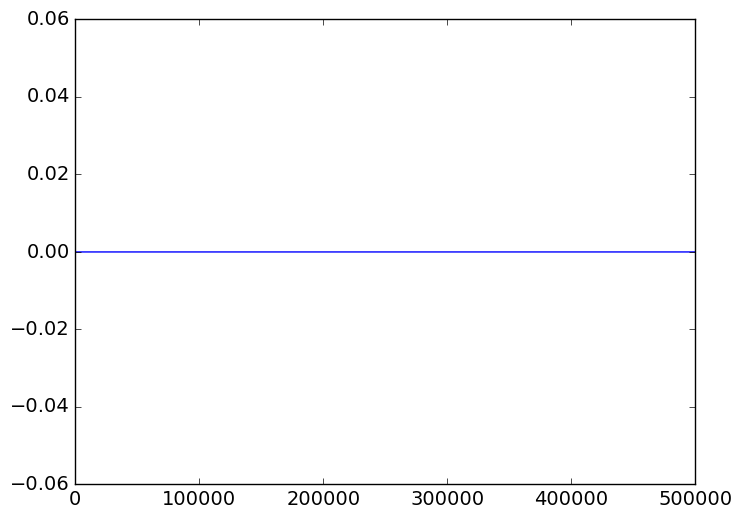

In [13]:
plt.figure(figsize=[10,4])
plt.xlim(0,3000)
plt.imshow(S1.signal[:,:3000],origin='left',aspect='auto',interpolation='none')
plt.show()
plt.plot(S1.signal[0,:])
plt.show()

In [14]:
P1 = PSS.Pulsar(S1)
P1.TimeBinSize

0.02

In [15]:
P1.pulses()

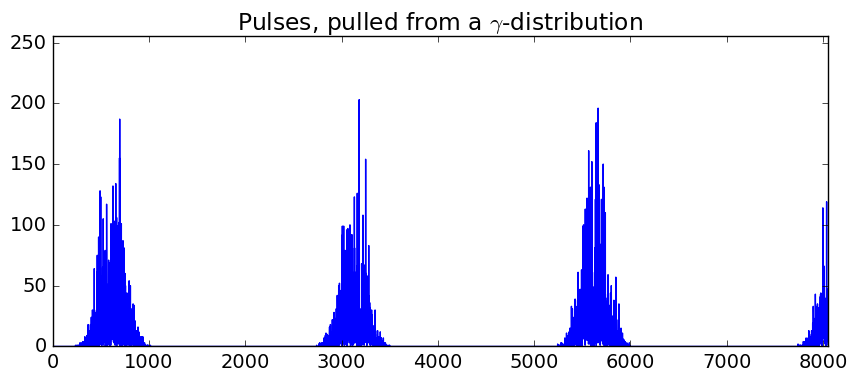

In [16]:
plt.figure(figsize=[10,4])
plt.xlim(0,8048)
plt.ylim(0,S1.MetaData.gamma_draw_max)
#plt.yticks([])
plt.title("Pulses, pulled from a $\gamma$-distribution")
plt.plot(P1.signal[0,:])
plt.show()

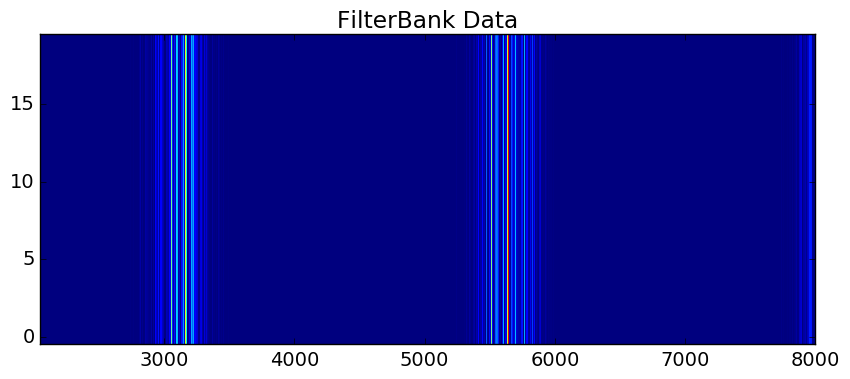

In [17]:
plt.figure(figsize=[10,4])
plt.xlim(2048,8000)
plt.title("FilterBank Data")
plt.imshow(S1.signal[:,:8000],origin='left',aspect='auto',interpolation='none')
plt.show()

In [18]:
ISM1 = PSS.ISM(S1)

In [19]:
ISM1.disperse(.2,to_DM_Broaden=False)

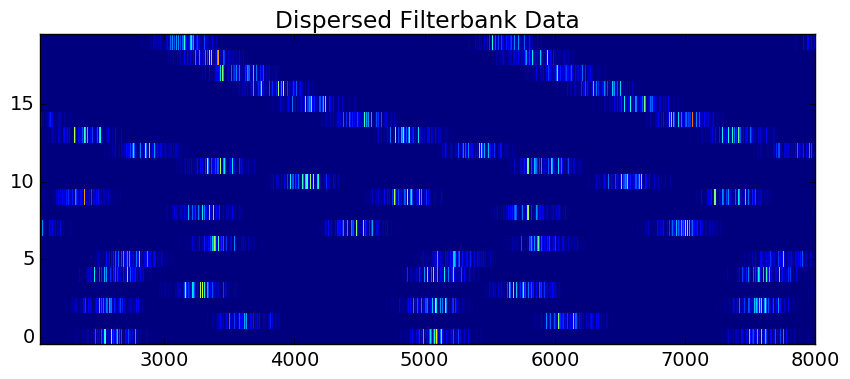

In [20]:
plt.figure(figsize=[10,4])
plt.xlim(2048,8000)
plt.title("Dispersed Filterbank Data")
plt.imshow(S1.signal[:,:8000],origin='left',aspect='auto',interpolation='none')
plt.show()

In [34]:
GBT1 = PSS.Telescope(S1)

In [35]:
GBT1.observe(noise=True)

Input signal sampling frequency=  50.0  kHz.
Telescope sampling frequency =  25.0  kHz


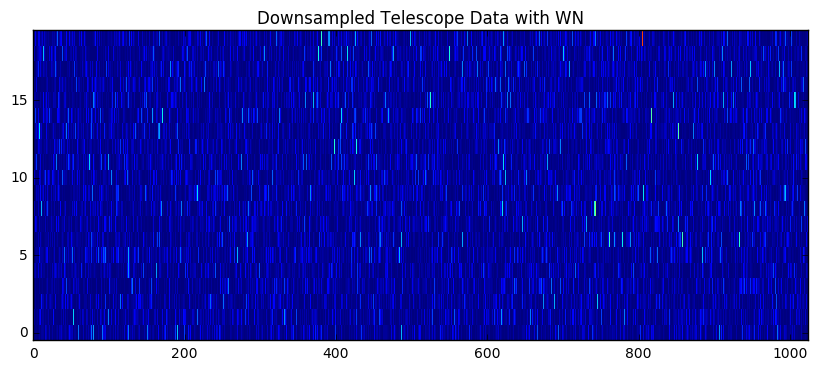

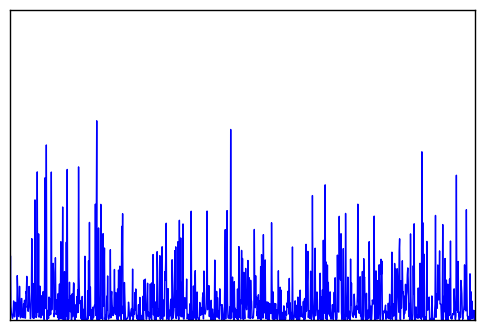

In [36]:
plt.figure(figsize=[10,4])
plt.title("Downsampled Telescope Data with WN")
plt.xlim(0,1024)
plt.imshow(GBT1.signal,origin='left',aspect='auto',interpolation='none')
plt.show()
plt.xlim(0,1024)
plt.ylim(0,30000)
plt.yticks([])
plt.xticks([])
plt.plot(GBT1.signal[0,:])
plt.show()

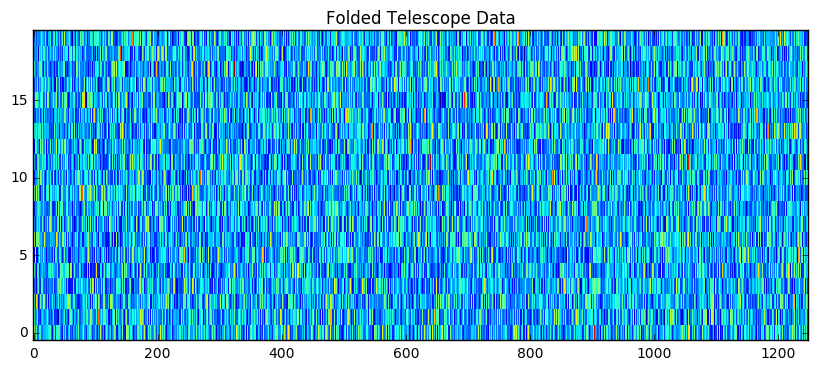

In [39]:
GBT1.fold(50.0, N_Folds=20)#(Period (ms), Number of Folds)
plt.figure(figsize=[10,4])
#plt.xlim(0,1024)
plt.title("Folded Telescope Data")
plt.imshow(GBT1.folded,origin='left',aspect='auto',interpolation='none')
plt.show()

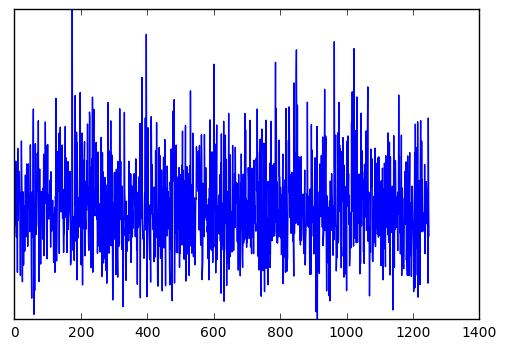

In [32]:
#plt.xlim(0,1024)
plt.yticks([])
plt.plot(GBT1.folded[0,:])

plt.show()